# Importing modules and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#reading the dataset
dataset=pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
#Dividing data into dependent and independent features
X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
#checking for null values
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# Data Preprocessing

In [7]:
#converting categorical to numerical features
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [8]:
X=pd.concat([X,geography,gender],axis=1)

In [9]:
X=X.drop(['Geography','Gender'],axis=1)

In [10]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [11]:
X.shape,y.shape

((10000, 11), (10000,))

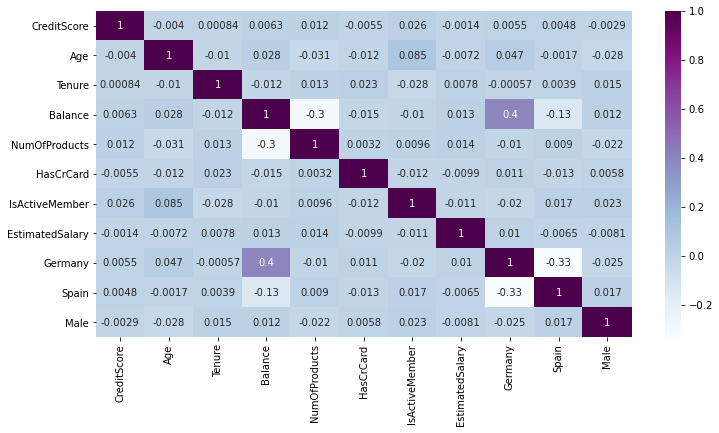

In [12]:
#co-relation plot
plt.figure(figsize=(12,6))
sns.heatmap(X.corr(),annot=True,cmap='BuPu')
plt.show()

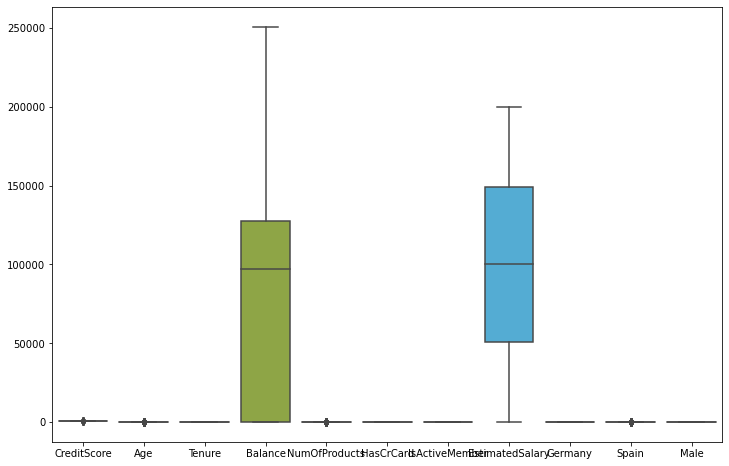

In [13]:
plt.figure(figsize=(12,8))
sns.boxplot(data=X)
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [15]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# Training the model (ANN)

In [16]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

In [17]:
#initialising ANN
model=Sequential()

output_dim=units=number of nodes(eg=6)

activation=name of activation fucn(eg=relu)

init=kernel_initialiser=weight initialisation technique(eg=he_uniform, for relu)

input_dim=number of input featues connect to hidden layer(number of featues of X_train)(eg=11)

In [18]:
#Adding input layer and first hidden layer
model.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu',input_dim=11))

#adding second hidden layer
model.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu'))

#adding output layer
model.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

#compiling the ANN
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [20]:
model_history=model.fit(X_train,y_train,validation_split=0.33,batch_size=32,epochs=100)

Epoch 1/100
168/168 [==============================] - 1s 4ms/step - loss: 0.5382 - accuracy: 0.7962 - val_loss: 0.5054 - val_accuracy: 0.7955
Epoch 2/100
168/168 [==============================] - 0s 3ms/step - loss: 0.4874 - accuracy: 0.7962 - val_loss: 0.4767 - val_accuracy: 0.7955
Epoch 3/100
168/168 [==============================] - 0s 3ms/step - loss: 0.4670 - accuracy: 0.7962 - val_loss: 0.4617 - val_accuracy: 0.7955
Epoch 4/100
168/168 [==============================] - 0s 3ms/step - loss: 0.4547 - accuracy: 0.7962 - val_loss: 0.4523 - val_accuracy: 0.7955
Epoch 5/100
168/168 [==============================] - 1s 3ms/step - loss: 0.4462 - accuracy: 0.7962 - val_loss: 0.4455 - val_accuracy: 0.7955
Epoch 6/100
168/168 [==============================] - 1s 3ms/step - loss: 0.4399 - accuracy: 0.7962 - val_loss: 0.4406 - val_accuracy: 0.7955
Epoch 7/100
168/168 [==============================] - 0s 3ms/step - loss: 0.4347 - accuracy: 0.7962 - val_loss: 0.4367 - val_accuracy: 0.7955

Epoch 58/100
168/168 [==============================] - 0s 3ms/step - loss: 0.3347 - accuracy: 0.8627 - val_loss: 0.3629 - val_accuracy: 0.8474
Epoch 59/100
168/168 [==============================] - 0s 3ms/step - loss: 0.3345 - accuracy: 0.8630 - val_loss: 0.3628 - val_accuracy: 0.8470
Epoch 60/100
168/168 [==============================] - 0s 3ms/step - loss: 0.3343 - accuracy: 0.8630 - val_loss: 0.3640 - val_accuracy: 0.8482
Epoch 61/100
168/168 [==============================] - 0s 3ms/step - loss: 0.3343 - accuracy: 0.8625 - val_loss: 0.3637 - val_accuracy: 0.8493
Epoch 62/100
168/168 [==============================] - 0s 3ms/step - loss: 0.3339 - accuracy: 0.8608 - val_loss: 0.3626 - val_accuracy: 0.8478
Epoch 63/100
168/168 [==============================] - 0s 3ms/step - loss: 0.3338 - accuracy: 0.8628 - val_loss: 0.3630 - val_accuracy: 0.8482
Epoch 64/100
168/168 [==============================] - 0s 3ms/step - loss: 0.3335 - accuracy: 0.8627 - val_loss: 0.3627 - val_accuracy:

# Visualization  of Model

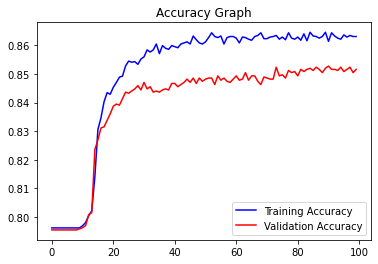

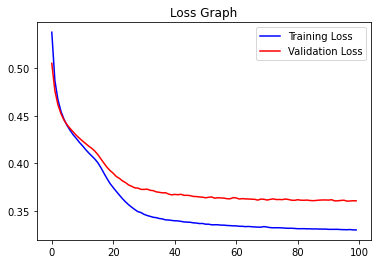

In [24]:
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

# Testing the model

In [25]:
y_pred=model.predict(X_test)
y_pred=(y_pred>0.5)

In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1521,   74],
       [ 206,  199]], dtype=int64)

In [27]:
#calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
print(score)

0.86
